In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
df = pd.read_csv('netflix.csv')
df.drop(columns=["description"], inplace=True)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


# Category Count

In [83]:
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

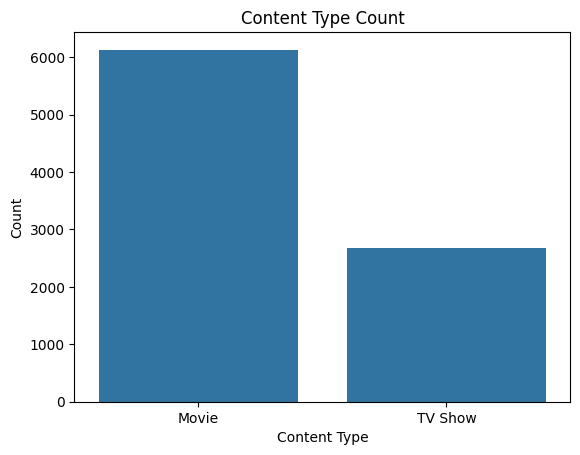

In [84]:
sns.countplot(x='type', data=df)
plt.title("Content Type Count")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.savefig('Content Type Count')
plt.show()


In [85]:
df['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

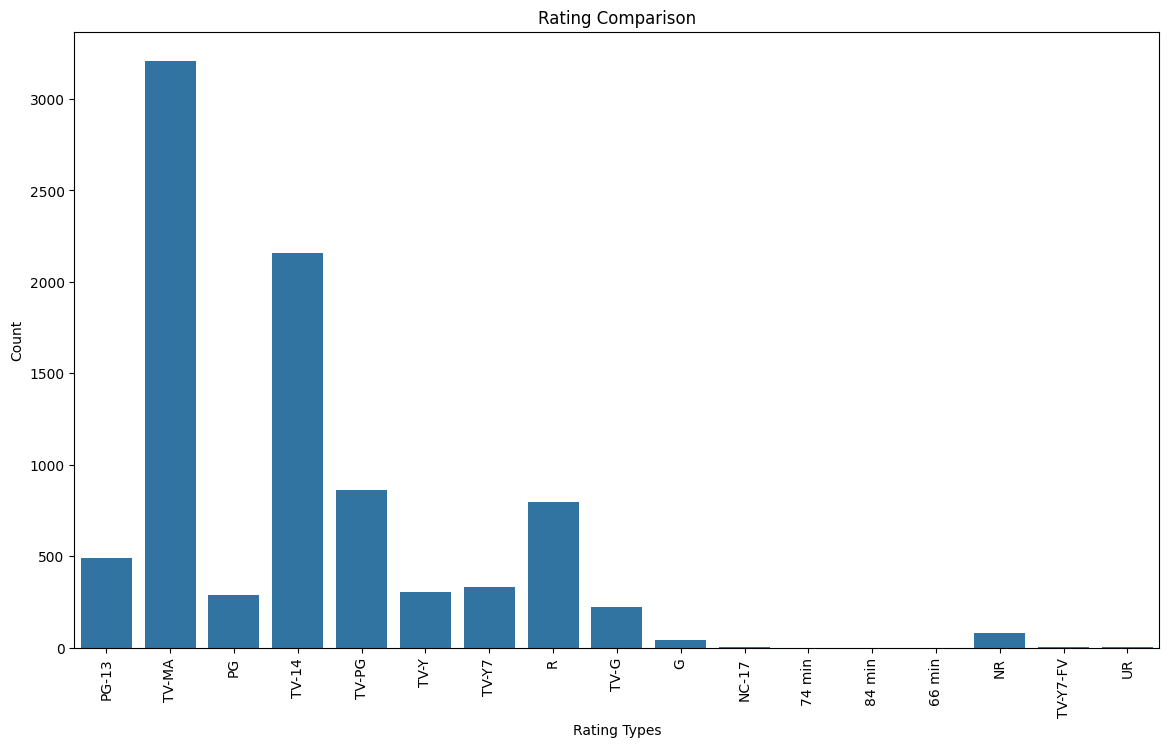

In [86]:
plt.figure(figsize=(14,8))
sns.countplot(x='rating', data=df)
plt.xticks(rotation=90)
plt.title("Rating Comparison")
plt.xlabel("Rating Types")
plt.ylabel("Count")
plt.savefig('Rating Comparison')
plt.show()

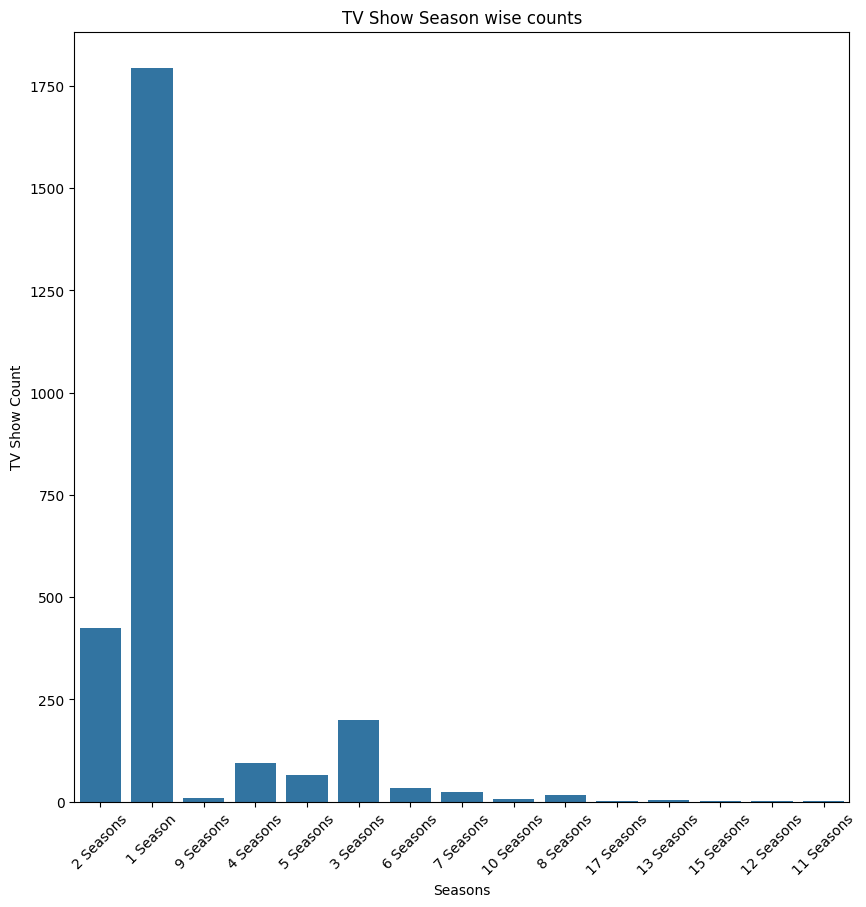

In [87]:
tv_show_count = df[df['type']=="TV Show"]
plt.figure(figsize=(10,10))
sns.countplot(x="duration", data=tv_show_count)
plt.title("TV Show Season wise counts")
plt.xlabel("Seasons")
plt.ylabel("TV Show Count")
plt.xticks(rotation=45)
plt.savefig('TV Show Season wise counts')
plt.show()

In [88]:
exploded_genre = df.copy()
exploded_genre['listed_in'] = exploded_genre['listed_in'].str.split(',')
exploded_genre = exploded_genre.explode('listed_in')
exploded_genre.rename(columns={'listed_in': 'Genre'}, inplace=True)
exploded_genre.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows


In [89]:
exploded_genre['Genre'].value_counts()

Genre
 International Movies        2624
Dramas                       1600
Comedies                     1210
Action & Adventure            859
Documentaries                 829
                             ... 
Romantic Movies                 3
Spanish-Language TV Shows       2
LGBTQ Movies                    1
TV Sci-Fi & Fantasy             1
Sports Movies                   1
Name: count, Length: 73, dtype: int64

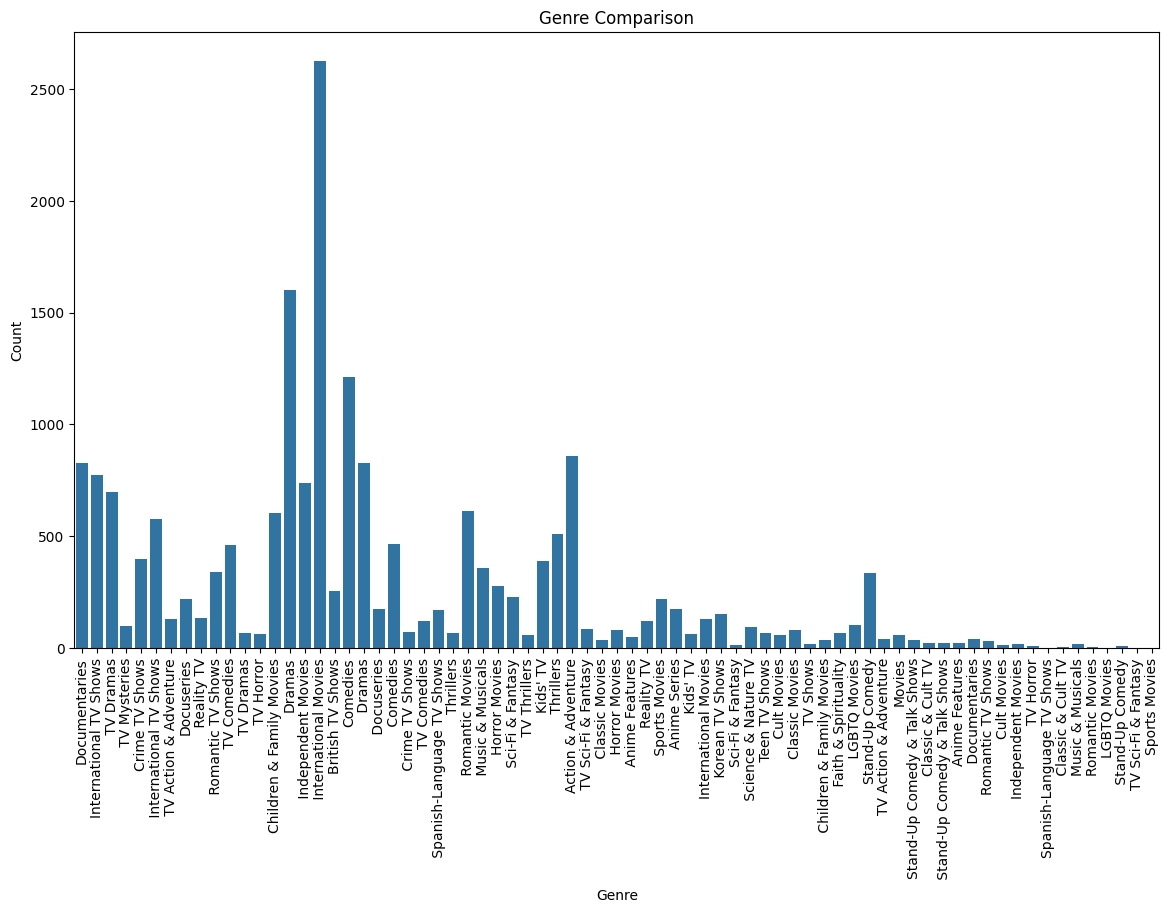

In [90]:
plt.figure(figsize=(14,8))
sns.countplot(x='Genre', data=exploded_genre)
plt.xticks(rotation=90)
plt.title("Genre Comparison")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.savefig('Genre Comparison')
plt.show()

# Average Movie Time And Seasons

In [91]:
def extract_duration_minutes(duration_str):      
    if pd.isna(duration_str) or not isinstance(duration_str, str):        
        return pd.NA      
    if 'min' in duration_str:        
        return int(duration_str.replace(' min', ''))    
    else:        
        return int(duration_str)
movie_show_count = df.copy()
movie_show_count = movie_show_count.loc[movie_show_count['type']=="Movie"]
movie_show_count['duration_minutes'] = movie_show_count['duration'].apply(extract_duration_minutes)
movie_show_count['duration_minutes'].fillna(movie_show_count['duration_minutes'].mean())

C:\Users\Saurabh\AppData\Local\Temp\ipykernel_24472\1767985430.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  movie_show_count['duration_minutes'].fillna(movie_show_count['duration_minutes'].mean())


0        90.0
6        91.0
7       125.0
9       104.0
12      127.0
        ...  
8801     96.0
8802    158.0
8804     88.0
8805     88.0
8806    111.0
Name: duration_minutes, Length: 6131, dtype: float64

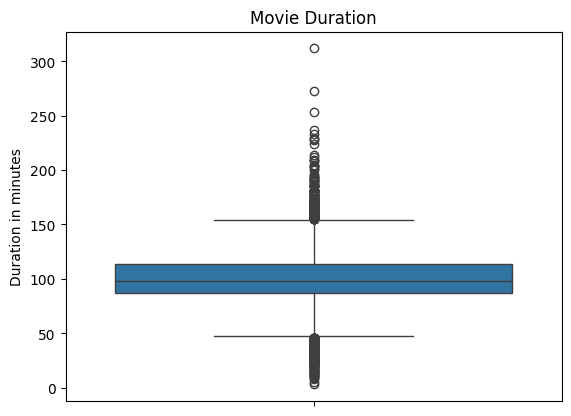

In [92]:
sns.boxplot(y='duration_minutes', data=movie_show_count)
plt.ylabel("Duration in minutes")
plt.title("Movie Duration")
plt.savefig("Movie Duration")
plt.show()

# Exploding the Dataframe

In [93]:
exploded_cast = df
exploded_cast['cast'] = exploded_cast['cast'].str.split(',')
exploded_cast = exploded_cast.explode('cast')
exploded_cast.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
1,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"


In [94]:
exploded_dir = df.copy()
exploded_dir['director'] = exploded_dir['director'].str.split(',')
exploded_dir = exploded_dir.explode('director')
exploded_dir.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"[Mayur More, Jitendra Kumar, Ranjan Raj, Al...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [95]:
exploded_country = df.copy()
exploded_country['country'] = exploded_country['country'].str.split(',')
exploded_country = exploded_country.explode('country')
exploded_country.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"[Mayur More, Jitendra Kumar, Ranjan Raj, Al...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


# Merging the Dataframe

In [96]:
cast_columns_keep = ["title", "cast"]
merged_dir_cast = None
merged_dir_cast = exploded_dir.merge(exploded_cast[cast_columns_keep], on="title")
merged_dir_cast = merged_dir_cast.drop("cast_x", axis=1)
merged_dir_cast.rename(columns={"cast_y":"cast"}, inplace=True)
merged_dir_cast.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,cast
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,NaN
1,s2,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",Ama Qamata
2,s2,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",Khosi Ngema
3,s2,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",Gail Mabalane
4,s2,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",Thabang Molaba


In [97]:
country_columns_keep = ["title","country"]
merged_dir_cast_country =  merged_dir_cast.merge(exploded_country[country_columns_keep], on="title")
merged_dir_cast_country = merged_dir_cast_country.drop("country_x", axis=1)
merged_dir_cast_country.rename(columns={"country_y":"country"}, inplace=True)
merged_dir_cast_country.head()

,show_id,type,title,director,date_added,release_year,rating,duration,listed_in,cast,country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"September 25, 2021",2020,PG-13,90 min,Documentaries,NaN,United States
1,s2,TV Show,Blood & Water,NaN,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",Ama Qamata,South Africa
2,s2,TV Show,Blood & Water,NaN,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",Khosi Ngema,South Africa
3,s2,TV Show,Blood & Water,NaN,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",Gail Mabalane,South Africa
4,s2,TV Show,Blood & Water,NaN,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",Thabang Molaba,South Africa


In [108]:
genre_columns_keep = ["title","Genre"]
merged_dir_cast_country_genre =  merged_dir_cast_country.merge(exploded_genre[genre_columns_keep], on="title")
# merged_dir_cast_country_genre = merged_dir_cast_country_genre.drop("country_x", axi# merged_dir_cast_country_genre.rename(columns={"country_y":"country"}, inplace=True)
merged_dir_cast_country_genre.drop(["listed_in"], axis=1, inplace=True)
merged_dir_cast_country_genre.head()

,show_id,type,title,director,date_added,release_year,rating,duration,cast,country,Genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"September 25, 2021",2020,PG-13,90 min,NaN,United States,Documentaries
1,s2,TV Show,Blood & Water,NaN,"September 24, 2021",2021,TV-MA,2 Seasons,Ama Qamata,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,NaN,"September 24, 2021",2021,TV-MA,2 Seasons,Ama Qamata,South Africa,TV Dramas
3,s2,TV Show,Blood & Water,NaN,"September 24, 2021",2021,TV-MA,2 Seasons,Ama Qamata,South Africa,TV Mysteries
4,s2,TV Show,Blood & Water,NaN,"September 24, 2021",2021,TV-MA,2 Seasons,Khosi Ngema,South Africa,International TV Shows


# Filling in NA values with Imputation and Unknown Values

In [109]:
def mode_cast(x):    
    return x.fillna(value={"cast":x["cast"].mode()})  
merged_dir_cast_country_genre = merged_dir_cast_country_genre.groupby(by="director",as_index=False, group_keys=False).apply(mode_cast)
merged_dir_cast_country_genre.head()

C:\Users\Saurabh\AppData\Local\Temp\ipykernel_24472\2175235851.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged_dir_cast_country_genre = merged_dir_cast_country_genre.groupby(by="director",as_index=False, group_keys=False).apply(mode_cast)


,show_id,type,title,director,date_added,release_year,rating,duration,cast,country,Genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"September 25, 2021",2020,PG-13,90 min,NaN,United States,Documentaries
58,s3,TV Show,Ganglands,Julien Leclercq,"September 24, 2021",2021,TV-MA,1 Season,Sami Bouajila,NaN,Crime TV Shows
59,s3,TV Show,Ganglands,Julien Leclercq,"September 24, 2021",2021,TV-MA,1 Season,Sami Bouajila,NaN,International TV Shows
60,s3,TV Show,Ganglands,Julien Leclercq,"September 24, 2021",2021,TV-MA,1 Season,Sami Bouajila,NaN,TV Action & Adventure
61,s3,TV Show,Ganglands,Julien Leclercq,"September 24, 2021",2021,TV-MA,1 Season,Tracy Gotoas,NaN,Crime TV Shows


In [110]:
merged_dir_cast_country_genre.reset_index(drop=True, inplace=True)

In [111]:
final_df = merged_dir_cast_country_genre.copy()

In [112]:
final_df.isnull().sum()

show_id            0
type               0
title              0
director           0
date_added         0
release_year       0
rating             7
duration           3
cast            1411
country         6970
Genre              0
dtype: int64

In [113]:
#making the dataframe cleaner by removing null values
final_df.fillna({"rating":"0", "duration":"0","cast":"Unknown Actor", "country":"Unknown Country"})
final_df.head()

,show_id,type,title,director,date_added,release_year,rating,duration,cast,country,Genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"September 25, 2021",2020,PG-13,90 min,NaN,United States,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,"September 24, 2021",2021,TV-MA,1 Season,Sami Bouajila,NaN,Crime TV Shows
2,s3,TV Show,Ganglands,Julien Leclercq,"September 24, 2021",2021,TV-MA,1 Season,Sami Bouajila,NaN,International TV Shows
3,s3,TV Show,Ganglands,Julien Leclercq,"September 24, 2021",2021,TV-MA,1 Season,Sami Bouajila,NaN,TV Action & Adventure
4,s3,TV Show,Ganglands,Julien Leclercq,"September 24, 2021",2021,TV-MA,1 Season,Tracy Gotoas,NaN,Crime TV Shows


# Converting Date Fields to datetime

In [114]:
#Convert date string to date YYYY-MM-DD format
def convert_date_format(date_string):
#    April 16, 2021
    month, day, year = date_string.split()    
    day = int(day[:-1])    
    month_map = {      
        "January": "01",      
        "February": "02",      
        "March": "03",      
        "April": "04",      
        "May": "05",      
        "June": "06",      
        "July": "07",      
        "August": "08",      
        "September": "09",      
        "October": "10",      
        "November": "11",      
        "December": "12"    }    
    return f"{year}-{month_map[month]}-{day:02d}"

In [115]:
final_df['date_added_dt'] = final_df['date_added'].apply(convert_date_format)
final_df['date_added_dt'] = pd.to_datetime(final_df['date_added_dt'])
final_df['date_added_delay'] = final_df['date_added_dt'].dt.year - final_df['release_year']

In [116]:
final_df["date_added_week"] = final_df['date_added_dt'].dt.isocalendar().week
final_df["date_added_month"] = final_df['date_added_dt'].dt.month
final_df['date_added_year'] = final_df['date_added_dt'].dt.year

In [117]:
movie_df = final_df[final_df['type']=="Movie"]
tv_show_df = final_df[final_df['type']=='TV Show']

# Best Week/Month to release Movie/TV Show

In [119]:
movie_week_counts = movie_df.groupby(by='date_added_week', as_index=False)["title"].nunique()
movie_week_counts.nlargest(5,"title")

,date_added_week,title
0,1,309
43,44,237
39,40,210
8,9,201
25,26,191


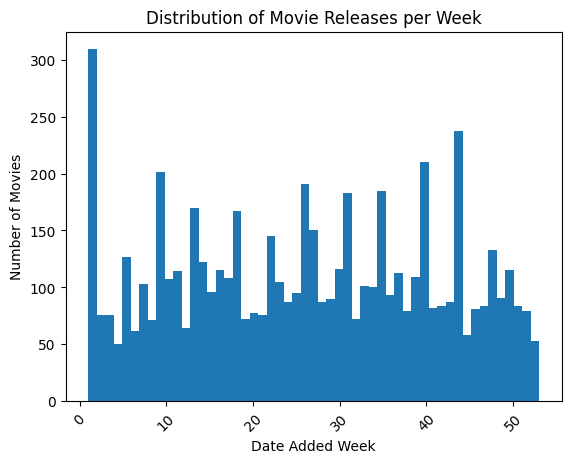

In [121]:
plt.hist(data=movie_week_counts, x='date_added_week', weights='title', bins=53)
plt.xlabel('Date Added Week')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Releases per Week')
plt.xticks(rotation=45)
plt.show()

In [122]:
movie_month_counts = movie_df.groupby(by='date_added_month', as_index=False)["title"].nunique()
movie_month_counts.nlargest(5,"title")

,date_added_month,title
6,7,554
3,4,532
9,10,530
11,12,525
0,1,524


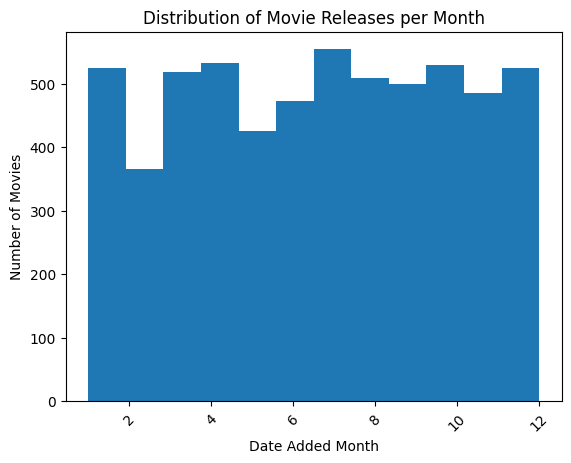

In [123]:
plt.hist(data=movie_month_counts, x='date_added_month', weights='title', bins=12)
plt.xlabel('Date Added Month')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Releases per Month')
plt.xticks(rotation=45)
plt.savefig("Dist of movie's per month")
plt.show()

In [124]:
tvshow_week_counts = tv_show_df.groupby(by='date_added_week', as_index=False)["title"].nunique()
tvshow_week_counts.nlargest(5,"title")

,date_added_week,title
12,13,11
23,24,10
50,51,9
37,38,8
4,5,7


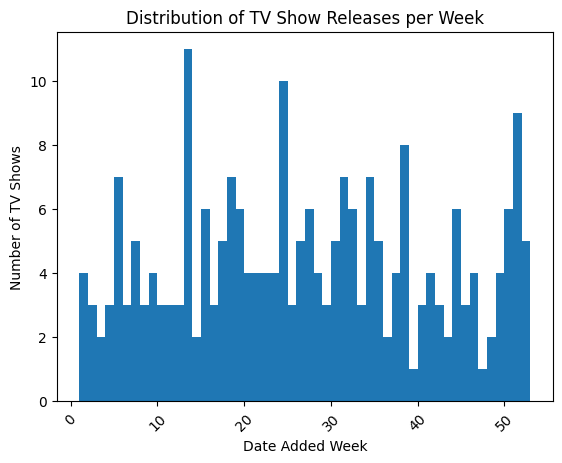

In [125]:
plt.hist(data=tvshow_week_counts, x='date_added_week', weights='title', bins=52)
plt.xlabel('Date Added Week')
plt.ylabel('Number of TV Shows')
plt.title('Distribution of TV Show Releases per Week')
plt.xticks(rotation=45)
plt.savefig("Dist of TV Shows per week")
plt.show()

In [126]:
tvshow_month_counts = tv_show_df.groupby(by='date_added_month', as_index=False)["title"].nunique()
tvshow_month_counts.nlargest(5,"title")

,date_added_month,title
2,3,24
11,12,24
6,7,23
5,6,22
7,8,21


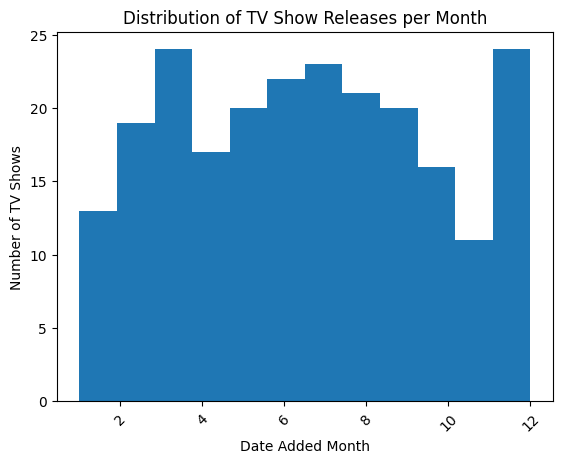

In [127]:
plt.hist(data=tvshow_month_counts, x='date_added_month', weights='title', bins=12)
plt.xlabel('Date Added Month')
plt.ylabel('Number of TV Shows')
plt.title('Distribution of TV Show Releases per Month')
plt.xticks(rotation=45)
plt.savefig("Dist of TV Shows per month")
plt.show()

# Most Active Actor and Director's

In [129]:
movie_actor_df = movie_df[movie_df['cast'] !="Unknown Actor"]
movie_actor_df = movie_actor_df.groupby('cast', as_index=False)['title'].nunique().nlargest(10,'title')
movie_actor_df

,cast,title
1929,Anupam Kher,38
16619,Om Puri,27
19051,Rupa Bhimani,27
27010,Shah Rukh Khan,26
3078,Boman Irani,25
16861,Paresh Rawal,25
11105,Julie Tejwani,24
24018,Akshay Kumar,23
17915,Rajesh Kava,21
11390,Kareena Kapoor,20


In [130]:
tvshow_actor_df = tv_show_df[tv_show_df['cast'] !="Unknown Actor"]
tvshow_actor_df = tvshow_actor_df.groupby('cast', as_index=False)['title'].nunique().nlargest(10,'title')
tvshow_actor_df


,cast,title
1122,River Huang,3
1384,Waratthaya Wongchayaporn,3
1476,David Attenborough,3
33,Ai Kayano,2
72,Ami Koshimizu,2
94,Anjali,2
133,Atsuko Tanaka,2
142,Bae Doona,2
157,Ben Diskin,2
166,Bertie Carvel,2


In [131]:
movie_dir_df = movie_df.groupby('director', as_index=False)['title'].nunique().nlargest(10, "title")
movie_dir_df

,director,title
3818,Rajiv Chilaka,22
234,Jan Suter,18
3865,Raúl Campos,18
4429,Suhas Kadav,16
2308,Jay Karas,15
3067,Marcus Raboy,15
1289,Cathy Garcia-Molina,13
2305,Jay Chapman,12
3135,Martin Scorsese,12
4840,Youssef Chahine,12


In [132]:
tvshow_dir_df = tv_show_df.groupby('director', as_index=False)['title'].nunique().nlargest(10, "title")
tvshow_dir_df

,director,title
86,Alastair Fothergill,3
187,Ken Burns,3
24,Gautham Vasudev Menon,2
153,Hsu Fu-chun,2
155,Iginio Straffi,2
173,Joe Berlinger,2
183,Jung-ah Im,2
255,Rob Seidenglanz,2
265,Shin Won-ho,2
272,Stan Lathan,2


# Country Wise TV Show and Movies

In [133]:
country_movie_df = movie_df.loc[movie_df['country']!="Unknown Country"]
country_movie_df = country_movie_df.groupby(by='country', as_index=False)['title'].nunique().nlargest(10, "title")
country_movie_df

,country,title
181,United States,2302
136,India,915
103,United States,382
180,United Kingdom,361
118,Canada,181
32,France,154
102,United Kingdom,152
127,France,148
18,Canada,128
172,Spain,127


In [134]:
country_tvshow_df = tv_show_df.loc[tv_show_df['country']!="Unknown Country"]
country_tvshow_df = country_tvshow_df.groupby(by='country', as_index=False)['title'].nunique().nlargest(10, "title")
country_tvshow_df

,country,title
46,United States,54
45,United Kingdom,25
19,United States,12
41,Spain,12
40,South Korea,11
29,India,10
31,Japan,10
42,Taiwan,8
28,France,7
23,Brazil,6


# Content Addition Time

In [135]:
#Need to add the Movie/TV Show within a year of release
after_2000 = final_df[final_df['date_added_dt'].dt.year > 2000]
after_2000['date_added_delay'].mode()

0    0
Name: date_added_delay, dtype: int64

# Genre Word Cloud

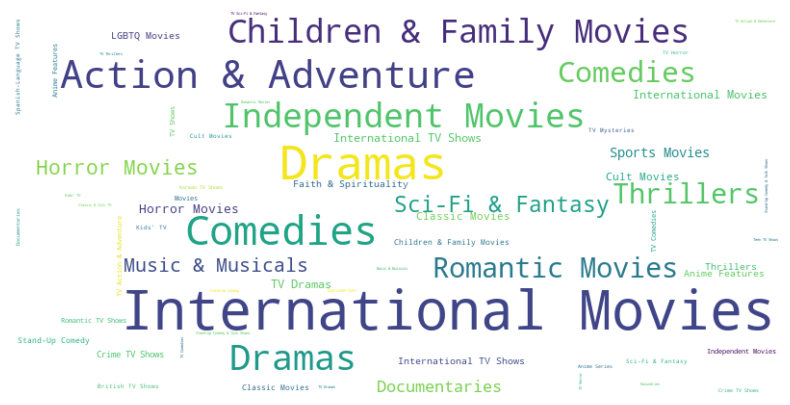

In [141]:
genres = final_df['Genre'].value_counts()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genres)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig("Genre Word Cloud")
plt.show()


# Movies Added Over Years

In [145]:
added_year_groupby = final_df.groupby(by='date_added_year', as_index=False)['title'].nunique()
release_year_groupby = final_df.groupby(by='release_year', as_index=False)['title'].nunique()

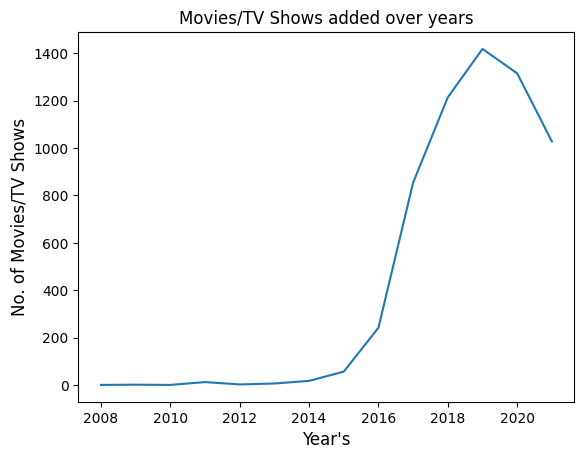

In [146]:
sns.lineplot(x="date_added_year",y="title", data=added_year_groupby)
plt.title('Movies/TV Shows added over years')
plt.xlabel("Year's", fontsize=12)
plt.ylabel("No. of Movies/TV Shows", fontsize=12)
plt.savefig("Content Added over year's")
plt.show()

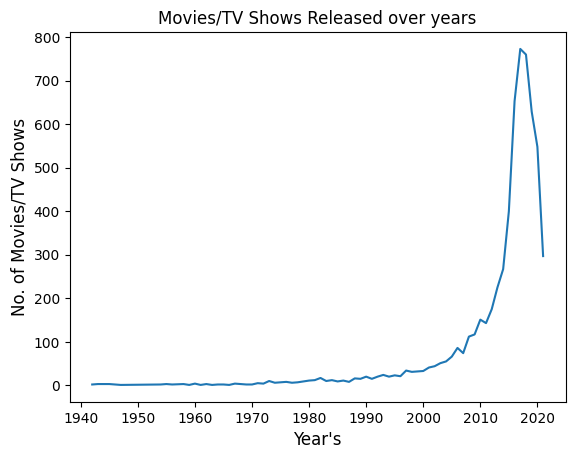

In [147]:
sns.lineplot(x="release_year",y="title", data=release_year_groupby)
plt.title('Movies/TV Shows Released over years')
plt.xlabel("Year's", fontsize=12)
plt.ylabel("No. of Movies/TV Shows", fontsize=12)
plt.savefig("Content Released over year's")
plt.show()